# 1.5 Union-Find

These are my notes for Coursera course [Algorithms, Part I](https://www.coursera.org/learn/algorithms-part1) by [Kevin Wayne](https://www.coursera.org/instructor/~246867) and [Robert Sedgewick](https://www.coursera.org/instructor/~250165), Princeton University. Special thanks to [Tara Walker](https://www.linkedin.com/in/taraewalker/) for recommending this course to me. I have decided to take this course and learn Python and Jupyter notebooks on Azure simultaneously. Failure is an option ;)

![Dynamic connectivity](./images/dynamic-connectivity.png)

There exists two “operations” `union()`, representing the Union command and `connected()`, representing the Find/connected query.

The order of execution of `union()` and `connected()` is important as `connected(0, 7)` returns `false` at the position 6 but returns `true` at position 12.

In Pythonic terms, we can see these two “operations” defined:

In [22]:
class DynamicConnectivity:

    def union(p, q):
        pass

    def connected(p, q):
        return false

>**Python note:**
>In C# or F# `DynamicConnectivity` would be an _interface_. Python does not have the concept of an interface.

## Quick-Find implmentation

In [35]:
class QuickFind(DynamicConnectivity):

    def __init__(self, n):
        self.id = [i for i in range(n)]

    def connected(self, p, q):
        return self.id[p] == self.id[q]

    def union(self, p, q):
        pid = self.id[p]
        qid = self.id[q]
        for i, x in enumerate(self.id):
            if(x == pid):
                self.id[i] = qid

quick_find = QuickFind(10)
quick_find.union(4, 3)
quick_find.union(3, 8)
quick_find.union(6, 5)
quick_find.union(9, 4)
quick_find.union(2, 1)

print(f'connected(0, 7): {quick_find.connected(0, 7)}')
print(f'connected(8, 9): {quick_find.connected(8, 9)}')

quick_find.union(5, 0)
quick_find.union(7, 2)
quick_find.union(6, 1)
quick_find.union(1, 0)

print(f'connected(0, 7): {quick_find.connected(0, 7)}')

print(quick_find.id)

connected(0, 7): False
connected(8, 9): True
connected(0, 7): True
[1, 1, 1, 8, 8, 1, 1, 1, 8, 8]


>**Python note:**
> The constructor as we know it in C# is expressed as `__init__` in Python. The `this` keyword we have in C# has `self` as its equivalent in Python. For detail, see, “[Why must ‘self’ be used explicitly in method definitions and calls?](https://docs.python.org/3/faq/design.html#why-must-self-be-used-explicitly-in-method-definitions-and-calls)”

### Quick-Find is too slow

Calling `range()` and `enumerate()` accesses `self.id` $N^2$ times. This characteristic makes Quick-Find a _quadratic algorithm_ or an algorithm of Polynomial [time complexity](https://en.wikipedia.org/wiki/Time_complexity#Polynomial_time). With `%timeit` and `%matplotlib`, we can see an extremely rough quadratic graph of Quick-Find size _vs._ `union()` exectution time:

In [24]:
def quick_find_timing(factor):
    quick_find = QuickFind(10**factor)
    timeit_result = %timeit -o quick_find.union(420, 70)
    return timeit_result.best

quick_find_domain = range(3, 7)
quick_find_timings = [quick_find_timing(i) for i in quick_find_domain]

381 µs ± 14.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.9 ms ± 303 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
41.5 ms ± 2.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
430 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


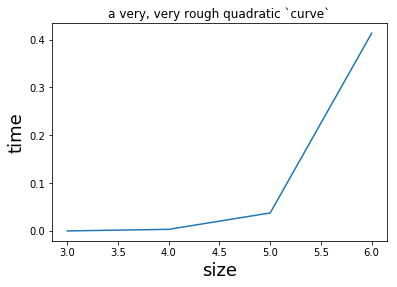

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(quick_find_domain, quick_find_timings)
plt.title('a very, very rough quadratic `curve`')
plt.xlabel('size', fontsize=18)
plt.ylabel('time', fontsize=18)
plt.show()

## Quick-Union implementation

In [26]:
class QuickUnion(DynamicConnectivity):

    def __init__(self, n):
        self.id = [i for i in range(n)]

    def root(self, i):
        while(i != self.id[i]):
            i = self.id[i]
        return i

    def connected(self, p, q):
        return self.root(p) == self.root(q)

    def union(self, p, q):
        i = self.root(p)
        j = self.root(q)
        self.id[i] = j

quick_union = QuickUnion(10)
quick_union.union(4, 3)
quick_union.union(3, 8)
quick_union.union(6, 5)
quick_union.union(9, 4)
quick_union.union(2, 1)

print(f'connected(0, 7): {quick_union.connected(0, 7)}')
print(f'connected(8, 9): {quick_union.connected(8, 9)}')

quick_union.union(5, 0)
quick_union.union(7, 2)
quick_union.union(6, 1)
quick_union.union(1, 0)

print(f'connected(0, 7): {quick_union.connected(0, 7)}')

print(quick_union.id)

connected(0, 7): False
connected(8, 9): True
connected(0, 7): True
[1, 1, 1, 8, 3, 0, 5, 1, 8, 8]


### Quick-Union is faster but also too slow

Calling `range()` and `self.root()` accesses `self.id` $N$ times. This suggests that Quick-Union is an algorithm of [linear time complexity](https://en.wikipedia.org/wiki/Time_complexity#Linear_time). With `%timeit` and `%matplotlib`, we should see a linear plot:

In [34]:
def quick_union_timing(factor):
    quick_union = QuickUnion(10**factor)
    timeit_result = %timeit -o quick_union.union(420, 70)
    return timeit_result.best

quick_union_domain = range(3, 8)
quick_union_timings = [quick_union_timing(i) for i in quick_union_domain]

4.29 µs ± 178 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.52 µs ± 297 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.45 µs ± 189 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.32 µs ± 172 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.29 µs ± 371 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


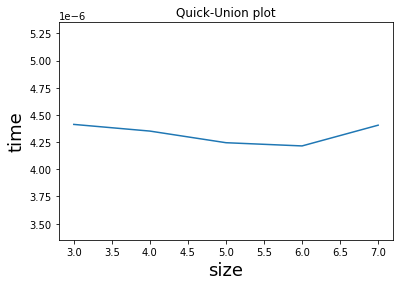

In [32]:
import numpy as np

plt.plot(quick_union_domain, quick_union_timings)
plt.title('Quick-Union plot')
plt.xlabel('size', fontsize=18)
plt.ylabel('time', fontsize=18)

y_median = np.median(quick_union_timings)
y_window = 10**-6
axes = plt.gca()
axes.set_ylim([y_median - y_window, y_median + y_window])
axes.yaxis.get_major_formatter().set_powerlimits((0, 1))

plt.show()

## weighted Quick-Union implementation

In [37]:
class WeightedQuickUnion(DynamicConnectivity):

    def __init__(self, n):
        self.id = [i for i in range(n)]
        self.sz = [0] * n

    def root(self, i):
        while(i != self.id[i]):
            i = self.id[i]
        return i

    def connected(self, p, q):
        return self.root(p) == self.root(q)

    def union(self, p, q):
        i = self.root(p)
        j = self.root(q)
        if(i == j): return
        if(self.sz[i] < self.sz[j]):
            self.id[i] = j
            self.sz[j] += self.sz[i]
        else:
            self.id[j] = i
            self.sz[i] += self.sz[j]

weighted_quick_union = WeightedQuickUnion(10)
weighted_quick_union.union(4, 3)
weighted_quick_union.union(3, 8)
weighted_quick_union.union(6, 5)
weighted_quick_union.union(9, 4)
weighted_quick_union.union(2, 1)

print(f'connected(0, 7): {weighted_quick_union.connected(0, 7)}')
print(f'connected(8, 9): {weighted_quick_union.connected(8, 9)}')

weighted_quick_union.union(5, 0)
weighted_quick_union.union(7, 2)
weighted_quick_union.union(6, 1)
weighted_quick_union.union(1, 0)

print(f'connected(0, 7): {weighted_quick_union.connected(0, 7)}')

print(weighted_quick_union.id)

connected(0, 7): False
connected(8, 9): True
connected(0, 7): True
[6, 2, 7, 4, 9, 6, 6, 6, 4, 9]


### weighted Quick-Union should be the fastest of the aforementioned

![Weighted quick-union analysis](./images/weighted-quick-union-analysis.png)


In [30]:
def weighted_quick_union_timing(factor):
    weighted_quick_union = WeightedQuickUnion(10**factor)
    timeit_result = %timeit -o weighted_quick_union.union(420, 70)
    return timeit_result.best

weighted_quick_union_domain = range(3, 8)
weighted_quick_union_timings = [weighted_quick_union_timing(i) for i in weighted_quick_union_domain]

4.23 µs ± 211 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.23 µs ± 114 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.32 µs ± 225 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.24 µs ± 152 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.46 µs ± 165 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


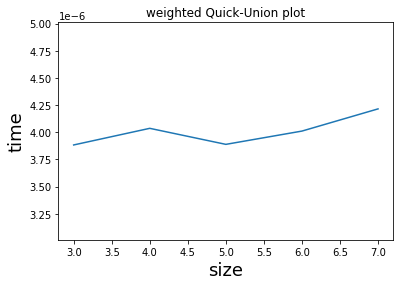

In [33]:
plt.plot(weighted_quick_union_domain, weighted_quick_union_timings)
plt.title('weighted Quick-Union plot')
plt.xlabel('size', fontsize=18)
plt.ylabel('time', fontsize=18)

y_median = np.median(weighted_quick_union_timings)
y_window = 10**-6
axes = plt.gca()
axes.set_ylim([y_median - y_window, y_median + y_window])
axes.yaxis.get_major_formatter().set_powerlimits((0, 1))

plt.show()

@[BryanWilhite](https://twitter.com/bryanwilhite)